In [1]:
import forest
from importlib import reload
reload(forest)
import os
from pandas import read_csv
import numpy as np

from datetime import datetime, timedelta

from multigrids import TemporalMultiGrid, TemporalGrid
import random_forest_tools as tools
reload(tools)
import matplotlib.pyplot as plt

data_dir = "/Users/rwspicer/Desktop/data/V1/"
feature_file = os.path.join(
    data_dir,
    "master-project/training/ACP/v1/temporal-multigrid/rf_traing_set_v1.yml"
)
label_file = os.path.join(
    data_dir,
    "thermokarst/initiation-regions/ACP/v3-1/PDM-5var/without_predisp/temporal-grid/ia_grid_5var.yml"
)

to_td = lambda x: timedelta(hours = int(x.split(':')[0]),minutes = int(x.split(':')[1]), seconds = float(x.split(':')[2]))
to_seconds = lambda x: int(x.split(':')[0]) *60 *60 + int(x.split(':')[1]) * 60 + float(x.split(':')[2])
to_min = lambda x: to_seconds(x) / 60
to_hour = lambda x: to_min(x) / 60
# data['train time'][np.logical_not(data['train time'].isna())].apply(to_min).hist()

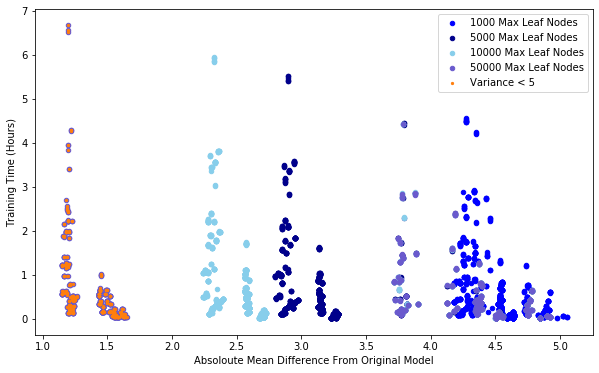

In [2]:
# os.popen('git pull').read()
data = read_csv('smaller_list_of_random_forests.csv', index_col=0)

# data['abs diff var'][np.logical_not(data['train time'].isna())].hist()
# data['abs diff mean'][np.logical_not(data['train time'].isna())].hist()

i_data = data[np.logical_not(data['train time'].isna())]

i_data[i_data['abs diff mean'] < 3].sort_values('train time')

i_data['training time (hours)'] = i_data['train time'].apply(to_hour )
# i_data['Absolute Mean Difference From']

fig, ax = plt.subplots(figsize = (10, 6))

# i_data.plot.scatter(y = 'training time (hours)', x = 'abs diff mean', ax = ax, c = 'tab:blue')

i_data[i_data['mln'] == 1000].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,c='blue', ax=ax, label="1000 Max Leaf Nodes")
i_data[i_data['mln'] == 5000].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,c='darkblue', ax=ax, label="5000 Max Leaf Nodes")
i_data[i_data['mln'] == 10000].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,c='skyblue', ax=ax, label="10000 Max Leaf Nodes")
i_data[i_data['mln'] == 50000].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,c='slateblue', ax=ax, label="50000 Max Leaf Nodes")

i_data[i_data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                                                 c='tab:orange',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

# i_data[i_data['mln'] == 50000].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,c='red', ax=ax)


ax.set_xlabel('Absoloute Mean Difference From Original Model')
ax.set_ylabel('Training Time (Hours)')
ax.legend()

In [3]:
def scatter_by_param(data, param, add_var=False):
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']
    symbols = ['o','o','o','o']
    
    vals = data[param].unique()
    
    fig, ax = plt.subplots(figsize = (20, 12))
    
    cix = 0
    for v in vals:
        data[data[param] == v].plot.scatter(y = 'training time (hours)', x = 'abs diff mean'  ,c=colors[cix], marker=symbols[cix], ax=ax, label= param + ' ' + str(v))
        cix += 1
    if add_var:
        data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                            c='tab:orange',marker = '.', ax = ax, alpha = .5, label="Variance < 5")


#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Absoloute Mean Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()
    
    

Index(['status', 'e', 'md', 'mf', 'mln', 'msl', 'mss', 'tdp', 'computer',
       'train time', 'predict time', 'diff mean', 'abs diff mean', 'diff var',
       'abs diff var', 'median', 'mode', 'training time (hours)'],
      dtype='object')

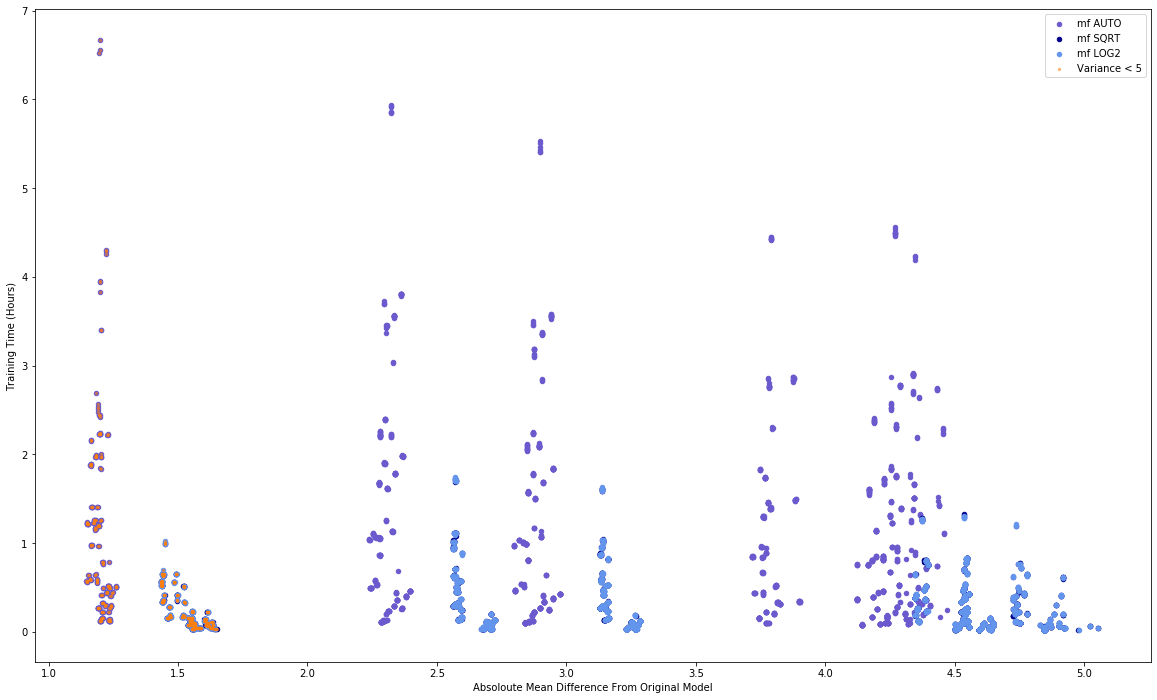

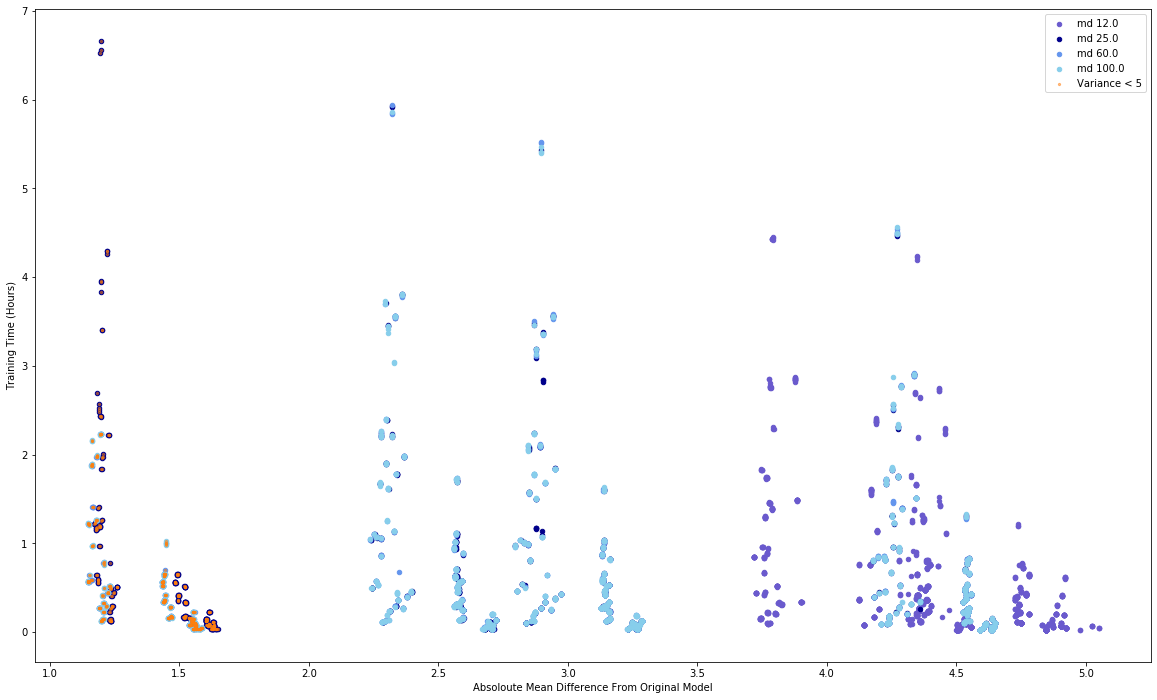

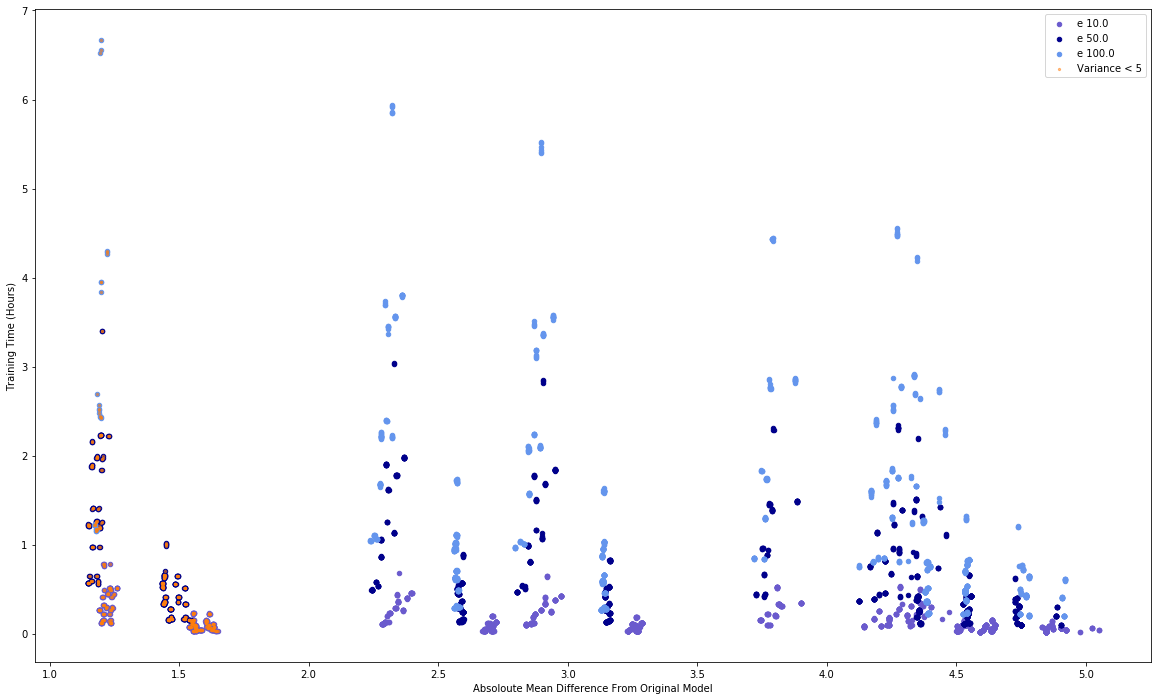

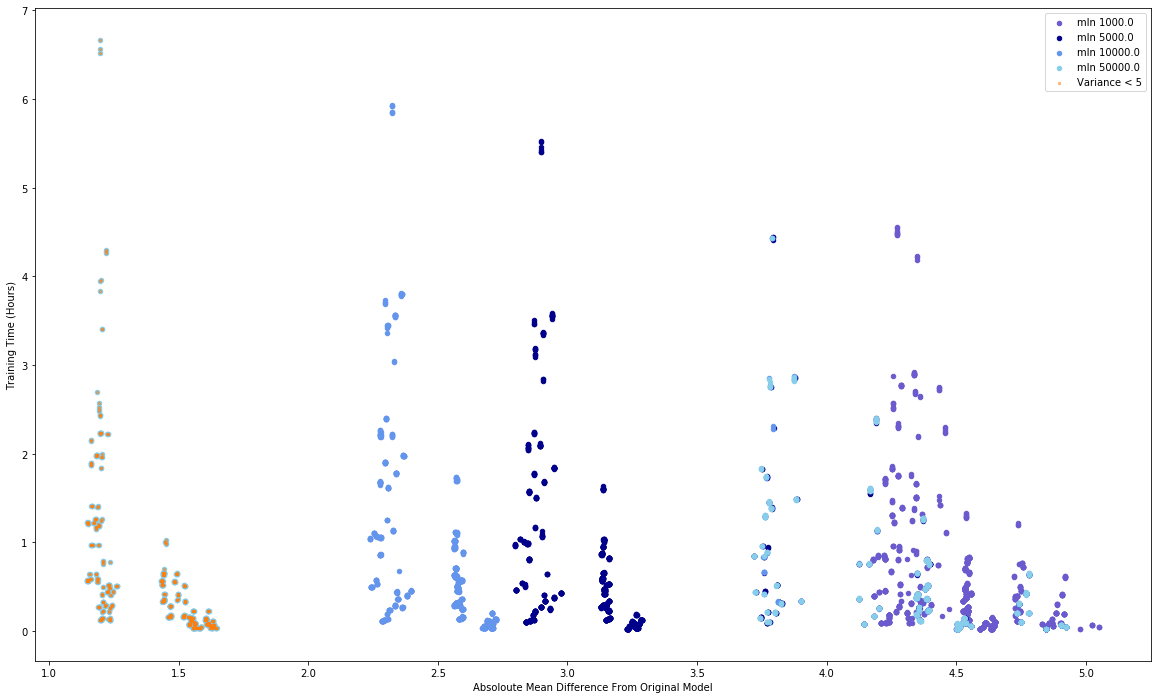

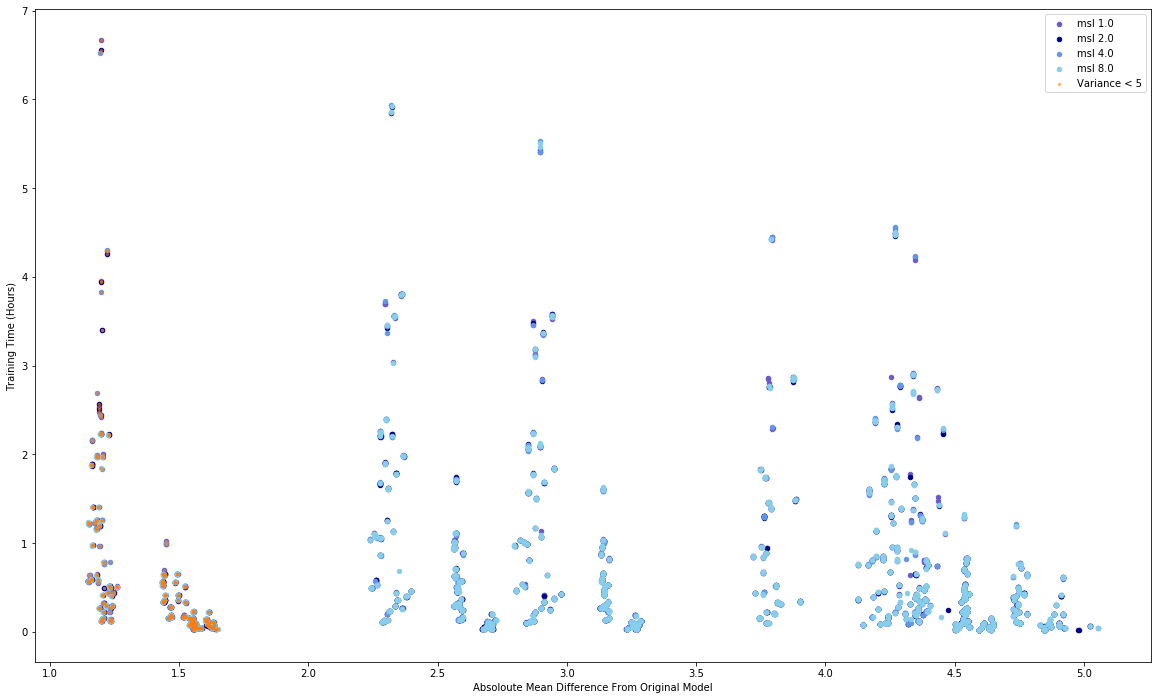

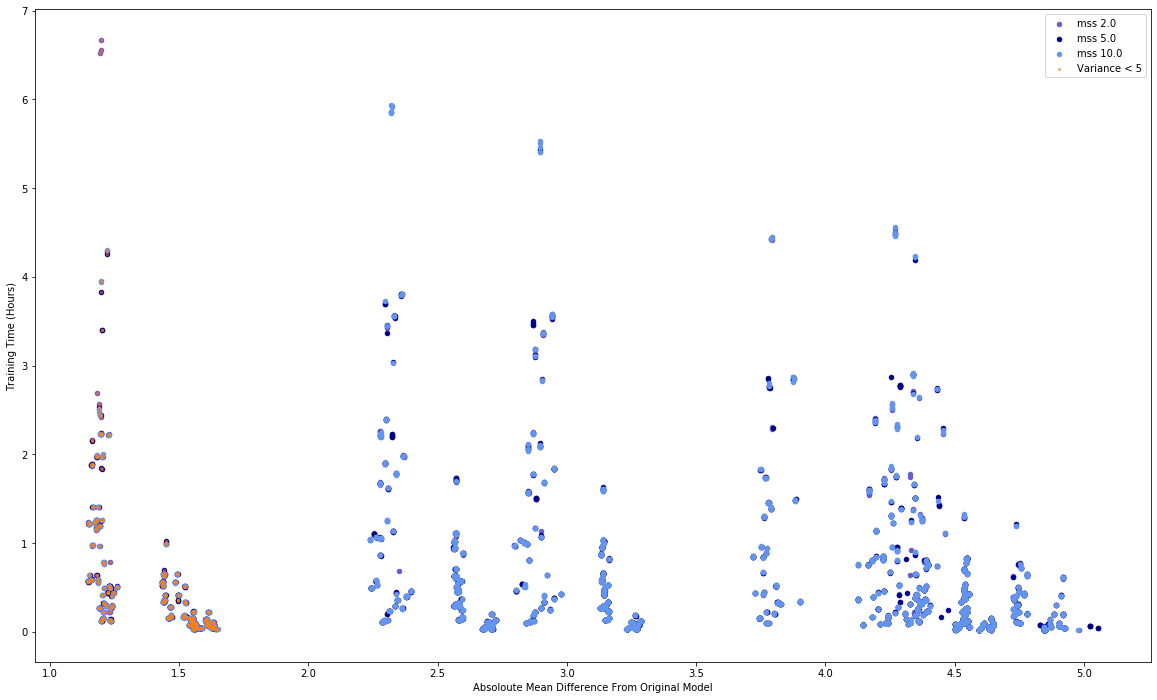

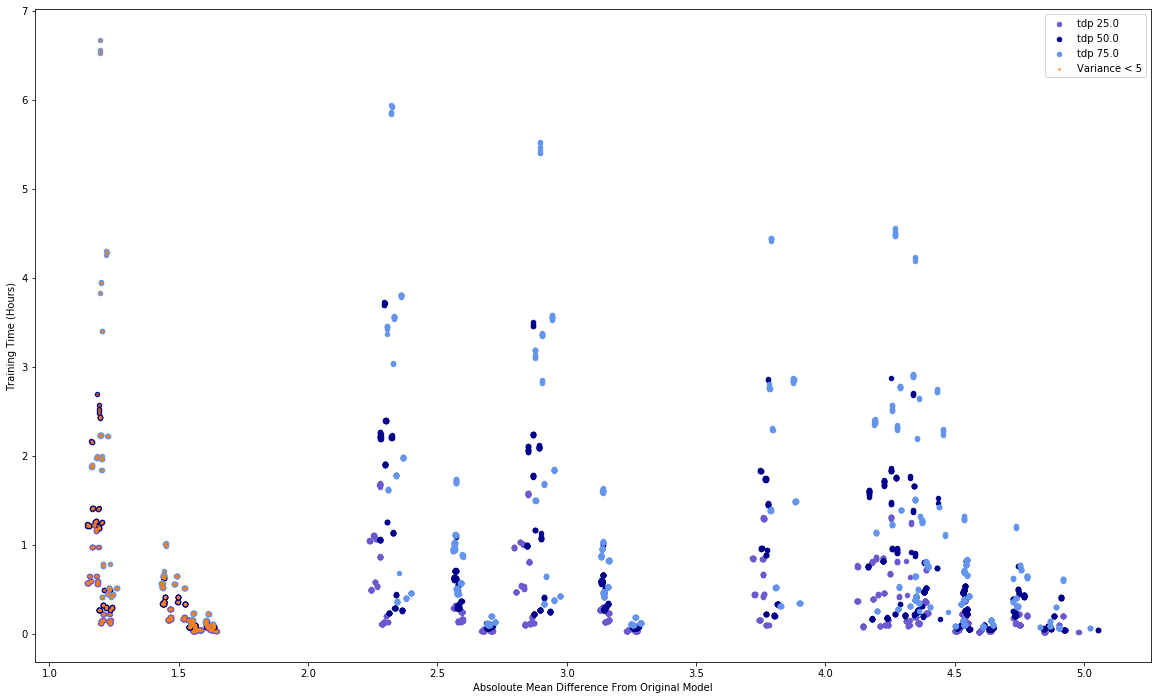

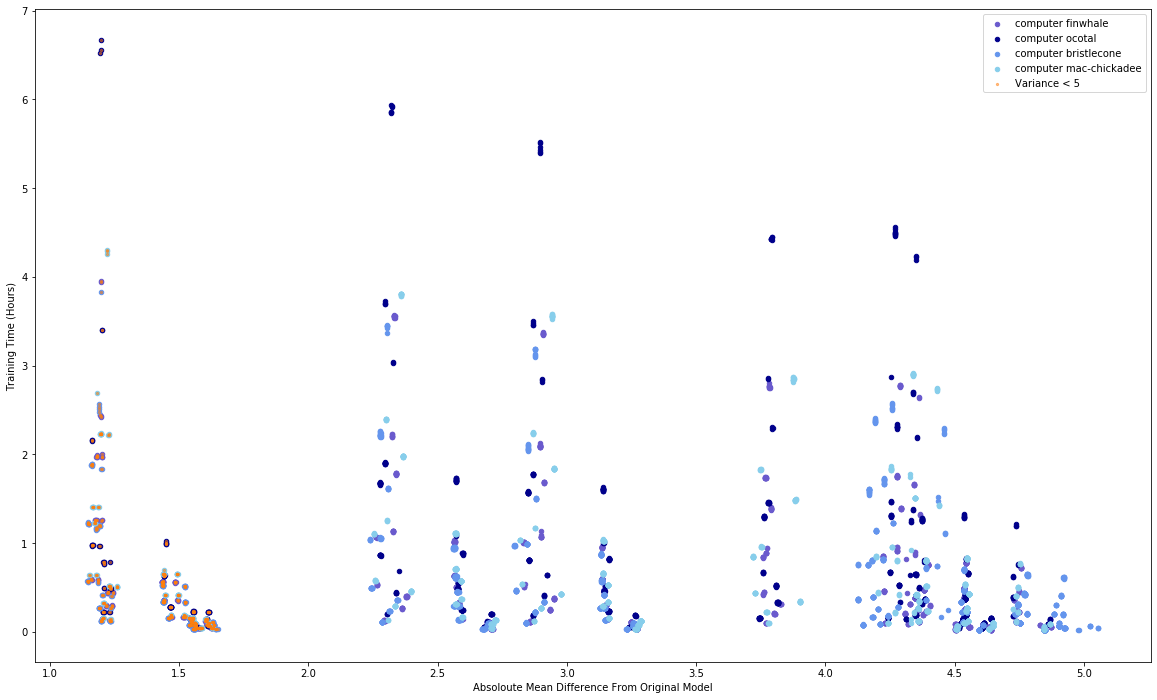

In [4]:
scatter_by_param(i_data, 'mf', True)
scatter_by_param(i_data, 'md', True)
scatter_by_param(i_data, 'e', True)
scatter_by_param(i_data, 'mln', True)
scatter_by_param(i_data, 'msl', True)
scatter_by_param(i_data, 'mss', True)
scatter_by_param(i_data, 'tdp', True)
scatter_by_param(i_data, 'computer', True)
i_data.columns

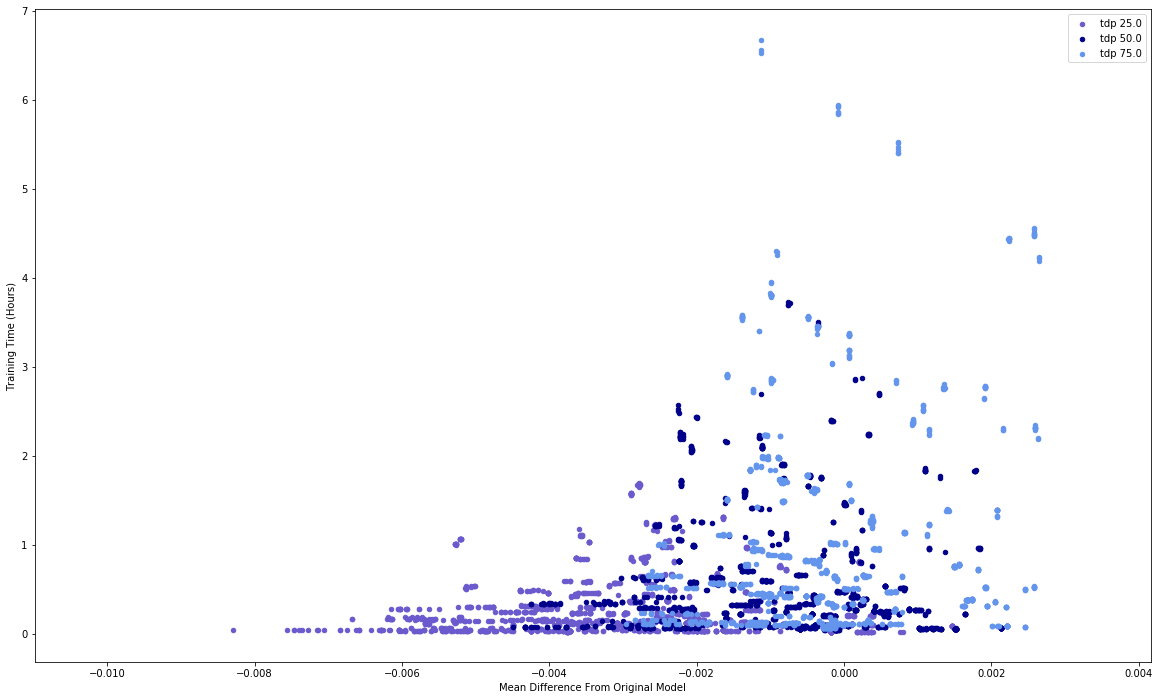

In [5]:
def scatter_by_param_2(data, param, add_var=False):
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']
    
    vals = data[param].unique()
    
    fig, ax = plt.subplots(figsize = (20, 12))
    
    cix = 0
    for v in vals:
        data[data[param] == v].plot.scatter(y = 'training time (hours)', x = 'diff mean' ,c=colors[cix], ax=ax, label= param + ' ' + str(v))
        cix += 1
    if add_var:
        data[data['diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'diff mean' ,
                            c='tab:orange',marker = '.', ax = ax, alpha = 1, label="Variance < 5")


#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Mean Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()

scatter_by_param_2(i_data, 'tdp', False)

In [6]:
i_data['training time (hours)'].cov(i_data['diff mean'])#('diff mean','training time (hours)')

0.00030203039973230407

In [7]:
param = 'md'
vals = i_data[param].unique()
for v in vals:
    ss = i_data[i_data[param] == v]
    print(v, ss['abs diff mean'].mean(), ss['abs diff var'].mean())
#     print(v, ss['diff mean'].mean(), ss['diff var'].mean())
print ('')
for v in vals:
    ss = i_data[i_data[param] == v]
#     print(v, ss['abs diff mean'].mean(), ss['abs diff var'].mean())
    print(v, ss['diff mean'].mean(), ss['diff var'].mean())

12.0 4.421164690593127 15.267127963079552
25.0 2.9535264011777196 8.168339242183535
60.0 3.020186057904811 8.414680434655669
100.0 2.952917547384127 8.16347756830352

12.0 -0.0004506675763893019 34.942808175841094
25.0 -0.0016365677844753085 18.032218879213886
60.0 -0.0016782441507411684 18.65508086672707
100.0 -0.0017441265777081688 18.06052701923012


In [8]:
# i_data['train time'].sort_values()

In [9]:
#i_data.to_csv('clean_data.csv')

[ 1000.  5000. 10000. 50000.]


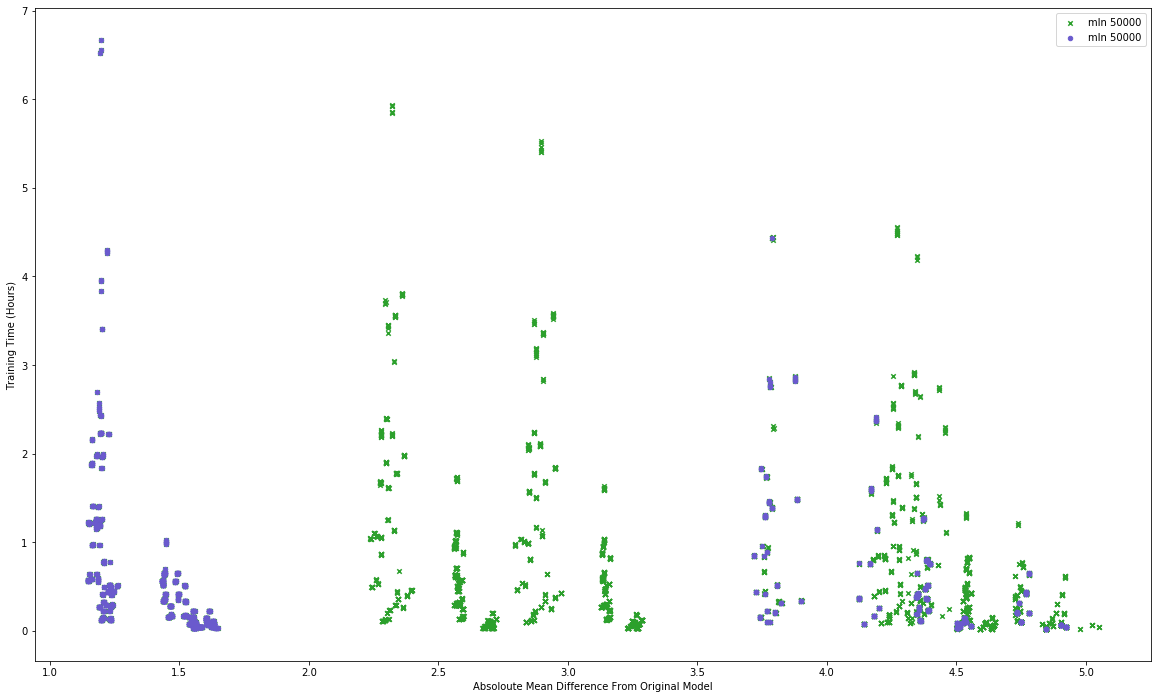

In [10]:
def scatter_by_param_3(data, param, v , add_var=False):
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']
    symbols = ['o','o','o','o']
    
    vals = data[param].unique()
    print(data[param].unique())
    
    fig, ax = plt.subplots(figsize = (20, 12))
    
    
    data.plot.scatter(y = 'training time (hours)', x = 'abs diff mean'  ,c='tab:green', marker='x', ax=ax, label= param + ' ' + str(v))


    cix = 0
#     for v in vals:
    data[data[param] == v].plot.scatter(y = 'training time (hours)', x = 'abs diff mean'  ,c=colors[cix], marker=symbols[cix], ax=ax, label= param + ' ' + str(v))
#     cix += 1
    if add_var:
        data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                            c='tab:orange',marker = '.', ax = ax, alpha = .5, label="Variance < 5")


#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Absoloute Mean Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()
    
scatter_by_param_3(i_data, 'mln', 50000, False)




In [11]:
for param in ['e', 'md', 'mf', 'mln', 'msl', 'mss', 'tdp', 'computer',]:
    print(param, i_data[param].unique())
    
print ('min abs diff mean',i_data['abs diff mean'].min())

e [ 10.  50. 100.]
md [ 12.  25.  60. 100.]
mf ['AUTO' 'SQRT' 'LOG2']
mln [ 1000.  5000. 10000. 50000.]
msl [1. 2. 4. 8.]
mss [ 2.  5. 10.]
tdp [25. 50. 75.]
computer ['finwhale' 'ocotal' 'bristlecone' 'mac-chickadee']
min abs diff mean 1.1460350482793569


In [12]:
print(i_data.columns)


idx_list = [('tdp',75),]# ('md',60), ('mf', 'AUTO'),('mln', 50000), ('msl', 4), ('mss',5), ('tdp',25)]
idx = i_data['e'] > 0


build_idx = lambda idx, data ,nf, nfv: np.logical_and(idx, data[nf] == nfv )

for i_l in idx_list:
    idx = build_idx(idx, i_data, i_l[0], i_l[1])

# print(i_data.shape)
print(i_data[idx].shape)
i_data[idx][['abs diff mean', 'abs diff var','training time (hours)']].sort_values('abs diff mean')


Index(['status', 'e', 'md', 'mf', 'mln', 'msl', 'mss', 'tdp', 'computer',
       'train time', 'predict time', 'diff mean', 'abs diff mean', 'diff var',
       'abs diff var', 'median', 'mode', 'training time (hours)'],
      dtype='object')
(1728, 18)


,abs diff mean,abs diff var,training time (hours)
name,,,
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,1.160473,1.602006,1.874627
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml,1.160473,1.602006,1.882754
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml,1.163443,1.588280,1.876119
rfm_e50_md60_mfAUTO_mln50000_msl2_mss2_tdp75.yml,1.163486,1.588269,1.870906
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,1.163487,1.588262,1.893483
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,1.163487,1.588262,1.893483
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,1.163487,1.588262,1.893483
rfm_e50_md60_mfAUTO_mln50000_msl8_mss2_tdp75.yml,1.180241,1.702501,1.973292
rfm_e50_md100_mfAUTO_mln50000_msl4_mss10_tdp75.yml,1.182403,1.688901,1.991090


In [13]:
from pandas import Index
list_of_models = [
    'rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml','rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml','rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml','rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml','rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml','rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml','rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml','rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml','rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml','rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml','rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml','rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml',
]

In [14]:
i_data[['abs diff mean', 'abs diff var','training time (hours)']].ix[list_of_models].sort_values('abs diff mean')


,abs diff mean,abs diff var,training time (hours)
name,,,
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,1.146035,1.726605,0.568037
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,1.146401,1.662335,0.564739
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,1.146401,1.662335,0.564739
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,1.160473,1.602006,1.874627
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml,1.160473,1.602006,1.882754
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml,1.163443,1.588280,1.876119
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml,1.171312,1.746009,1.221215
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml,1.173560,1.724226,1.224195
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml,1.173625,1.724271,1.231990


In [ ]:
model.feature_importances_
grid_names = ['fdd', 'tdd', 'tdd+1', 'ewp', 'fwp', 'sp', 'lsp', 'sp+1', 'lat', 'long','aspect','slope', 'elev' ]
feature_list = grid_names
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
print ('\n\n\n\n')

In [55]:
def scatter_by_param_4(data, param, add_var=False, list_of_targets=[]):
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']
    symbols = ['o','o','o','o']
    
    vals = data[param].unique()
    
    fig, ax = plt.subplots(figsize = (20, 12))
    
    cix = 0
#     for v in vals:
#         data[data[param] == v].plot.scatter(y = 'training time (hours)', x = 'abs diff mean'  ,alpha = .25, c=colors[cix], marker=symbols[cix], ax=ax, label= param + ' ' + str(v))
#         cix += 1
    if add_var:
        data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                            c='tab:orange',marker = '.', ax = ax, alpha = .5, label="Variance < 5")

#     data.ix(np.array(list_of_targets))
#     for target in list_of_targets:
#         print (data.ix[target])
    i_data[['abs diff mean', 'abs diff var','training time (hours)']].ix[list_of_targets].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                        c='tab:red',marker = 'o',s=80, ax = ax, alpha = 1, label="Variance < 5")
#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Absoloute Mean Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()
    
    

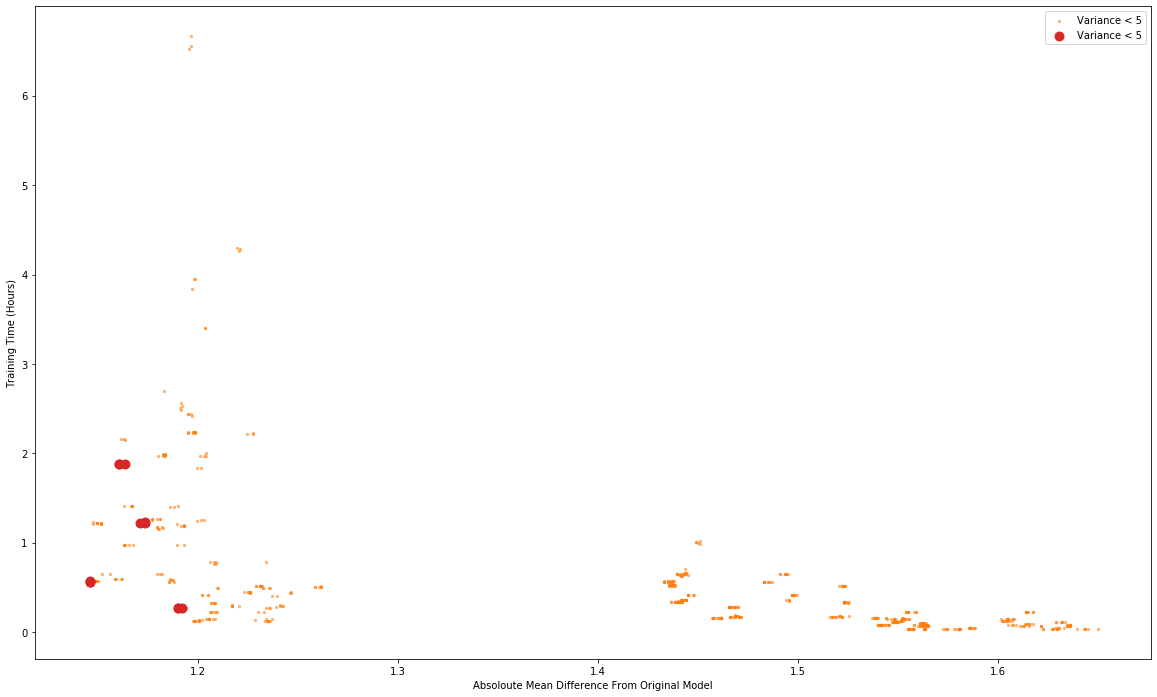

In [57]:
scatter_by_param_4(i_data, 'md', True, list_of_models)